In [2]:
import matplotlib.pyplot as plt
import json
import numpy
import pandas as pd
import datetime

In [3]:
def plotGraph(y, time, action):
    userInput = ("Enter if you want to plot KeyUp or KeyDowns")
    data = y
    x = list(range(len(data)))

    # Average
    average = numpy.mean(data)
    # Words Per Minute = (Chr / 5) / Time
    wpm = 1000 * len(data) / time

    # MatPlotLib Handling
    plt.title("Time Elapsed Between "+action+" Events")
    plt.ylabel("Key Number")
    plt.ylabel("Milliseconds")
    plt.plot(x, y)
    # Format average display box
    plt.text(5, 35, ("WPM: ", wpm, "Average", average) ,style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.show()

In [4]:
def gettimeBetweenUPS(ksdf):
    action = 'Up'
    ups = list(ksdf[ksdf.action == action].time)
    time = ups[len(ups) - 1] - ups[0]
    time_between_ups = []
    while len(ups) > 1:
         #Get the time from the tuple
        startTime = ups.pop(0)
        betweenTime = ups[0] - startTime
        time_between_ups.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return (time_between_ups)

def timeBetweenUPS(ksdf):
    action = 'Up'
    ups = list(ksdf[ksdf.action == action].time)
    time = ups[len(ups) - 1] - ups[0]
    plotGraph(gettimeBetweenUPS(ksdf), time, action)

In [5]:
def gettimeBetweenDOWNS(ksdf):
    action = 'Down'
    downs = list(ksdf[ksdf.action == action].time)
    time_between_downs = []
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        startTime = downs.pop(0) #Get the time from the tuple
        betweenTime = downs[0] - startTime
        time_between_downs.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return time_between_downs
    
def timeBetweenDOWNS(ksdf):
    action = 'Down'
    downs = list(ksdf[ksdf.action == action].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeBetweenDOWNS(ksdf), time, action)

In [6]:
def gettimeHoldingKey(ksdf):
    action = 'Hold'
    time_holding_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    while len(downs) > 1:
        downTime = downs.pop(0)
        holdTime = ups.pop(0) - downTime
        time_holding_key.append(holdTime)
        #average = numpy.mean(time_between_downs)
    return time_holding_key
    
def timeHoldingKey(ksdf):
    action = 'Hold'
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeHoldingKey(ksdf), time, action)

In [7]:
def gettimeBetweenKey(ksdf):
    action = 'Between'
    time_between_key = []
    ups = list(ksdf[ksdf.action == 'Up'].time)
    downs = list(ksdf[ksdf.action == 'Down'].time)
    del downs[0]
    time = downs[len(downs) - 1] - downs[0]
    while len(ups) > 1:
        upTime = ups.pop(0)
        betweenTime = downs.pop(0) - upTime
        time_between_key.append(betweenTime)
        #average = numpy.mean(time_between_downs)
    return time_between_key
    
def timeBetweenKey(ksdf):
    action = 'Between'
    downs = list(ksdf[ksdf.action == 'Down'].time)
    time = downs[len(downs) - 1] - downs[0]
    plotGraph(gettimeBetweenKey(ksdf), time, action)

In [11]:
userdf = pd.read_csv('userdata.csv')
userdf#[userdf.username == 'd3'

,username,sn,phrase,date,key,action,time
0,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Down,694791687
1,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Down,694791765
2,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Up,694791812
3,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Up,694791859
4,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Down,694791953
5,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Up,694792046
6,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Down,694792156
7,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,H,Up,694792250
8,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Down,694792296
9,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,B,Up,694792406


In [51]:
# userdf = userdf.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [10]:
userdf.drop(userdf[(userdf.sn == 22) & (userdf.username == 'daniil')].index, inplace=True)
userdf.to_csv('userdata.csv', index=False)

    username    sn   phrase                        date key action       time
140   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   D   Down  694805968
141   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   S   Down  694806046
142   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   D     Up  694806093
143   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   S     Up  694806140
144   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   L   Down  694806265
145   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   L     Up  694806359
146   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   H   Down  694806453
147   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   H     Up  694806546
148   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   B   Down  694806593
149   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   B     Up  694806687
150   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   Y   Down  694806718
151   george  10.0  dslhbyj  2018-06-03 12:59:03.924648   Y     

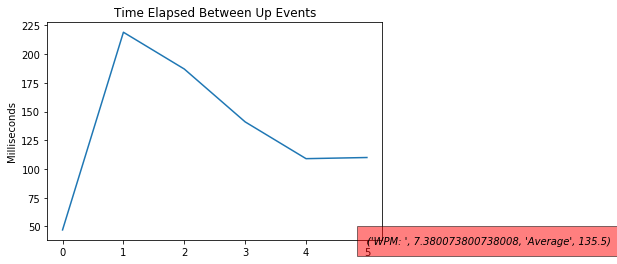

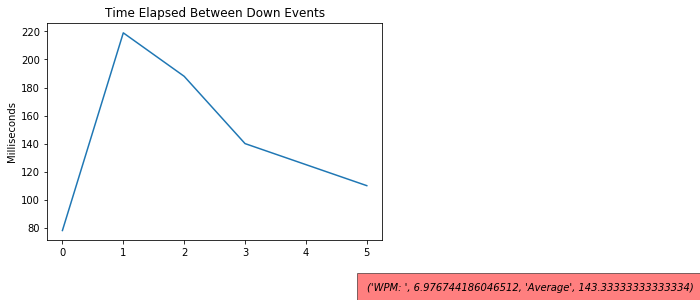

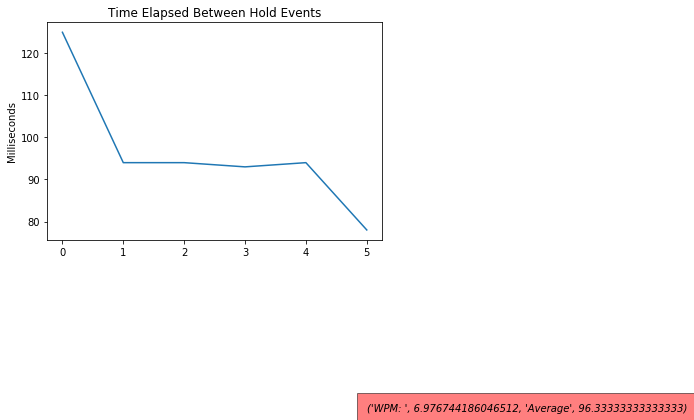

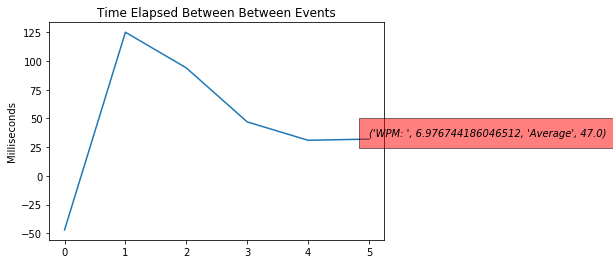

In [154]:
sn = 10
username = 'george'
print(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenUPS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenDOWNS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeHoldingKey(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenKey(userdf[(userdf.sn == sn) & (userdf.username == username)])

    username    sn   phrase                        date key action       time
380   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   D   Down  696876593
381   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   D     Up  696876671
382   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   S   Down  696876765
383   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   S     Up  696876859
384   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   L   Down  696877046
385   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   L     Up  696877125
386   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   H   Down  696877593
387   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   H     Up  696877671
388   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   B   Down  696877781
389   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   B     Up  696877875
390   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   Y   Down  696878000
391   tamara  10.0  dslhbyj  2018-06-03 13:33:35.568838   Y     

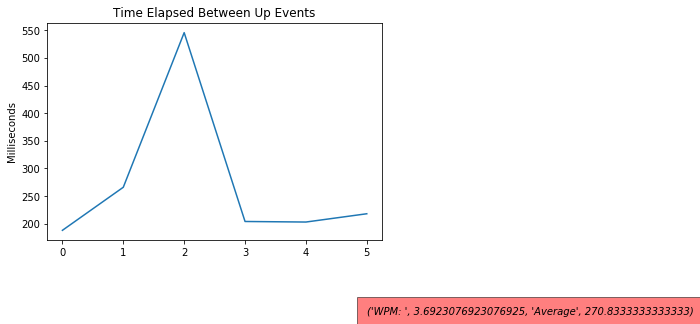

[172, 281, 547, 188, 219, 218]


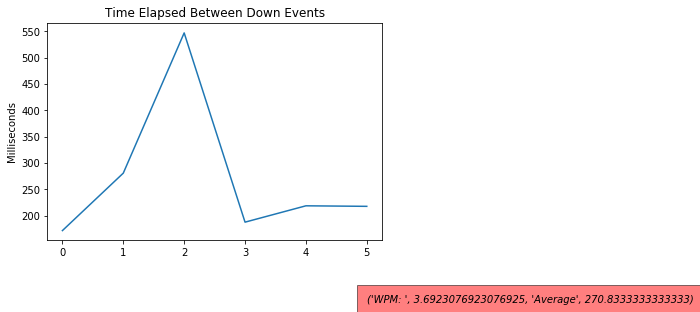

[78, 94, 79, 78, 94, 78]


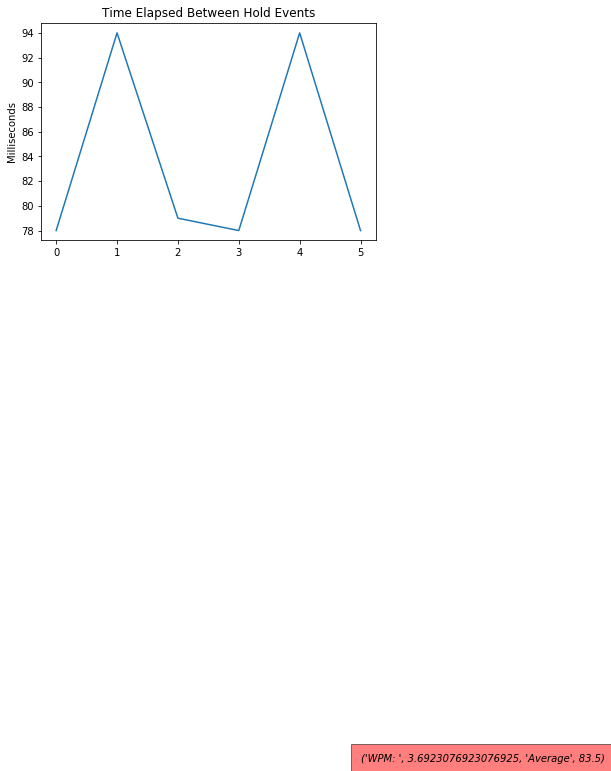

[94, 187, 468, 110, 125, 140]


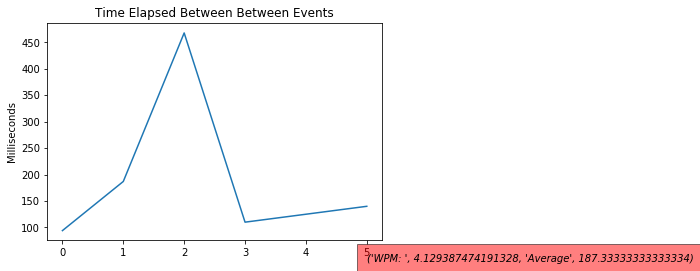

In [113]:
sn = 10
username = 'tamara'
print(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenUPS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenDOWNS(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeHoldingKey(userdf[(userdf.sn == sn) & (userdf.username == username)])
timeBetweenKey(userdf[(userdf.sn == sn) & (userdf.username == username)])

In [93]:
userdf.head()

,username,sn,phrase,date,key,action,time
0,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Down,694791687
1,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Down,694791765
2,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,D,Up,694791812
3,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,S,Up,694791859
4,george,0.0,dslhbyj,2018-06-03 12:58:49.658198,L,Down,694791953


In [118]:
usnd = getUserSnDict(userdf[userdf.phrase == 'dslhbyj'])

In [121]:
usnd['george'][0]

0.0

In [215]:
X = pd.DataFrame()
for user in usnd:
    for sn in usnd[user]:
        df = userdf[(userdf.sn == sn) & (userdf.username == user)]
        X = pd.concat([X, pd.DataFrame([[user] + [sn] +
        gettimeBetweenDOWNS(df) + 
        gettimeBetweenUPS(df) +
        gettimeBetweenKey(df) +
        gettimeHoldingKey(df)])], ignore_index=True)

In [216]:
X.iloc[:,2:].head()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,157,390,297,172,219,203,157,390,313,156,...,219,78,141,125,78,78,78,94,78,78
1,187,297,391,171,235,219,203,297,375,187,...,297,93,141,141,78,94,94,78,94,78
2,219,328,406,188,219,234,203,328,391,187,...,312,109,141,156,110,94,94,79,78,78
3,203,281,438,187,172,188,218,266,422,172,...,344,109,109,110,94,109,94,78,63,78
4,219,328,328,188,218,204,219,328,328,187,...,234,94,125,125,94,94,94,94,93,79


In [174]:
X[X[0] == 'george'].describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,8.000000,81.764706,248.235294,196.647059,141.411765,137.941176,120.294118,53.294118,229.764706,197.588235,...,109.411765,53.235294,31.176471,24.823529,134.176471,105.705882,87.235294,88.176471,106.764706,95.470588
std,5.049752,8.785851,49.074598,14.679668,10.314182,20.798049,25.599719,7.888003,44.074552,11.011692,...,15.568634,9.750189,17.447189,24.543928,11.170471,11.703443,7.854373,11.052349,11.371727,9.281148
min,0.000000,62.000000,188.000000,171.000000,125.000000,109.000000,93.000000,46.000000,187.000000,187.000000,...,78.000000,31.000000,0.000000,0.000000,109.000000,93.000000,78.000000,78.000000,93.000000,78.000000
25%,4.000000,78.000000,218.000000,188.000000,140.000000,125.000000,109.000000,47.000000,203.000000,187.000000,...,94.000000,47.000000,16.000000,15.000000,125.000000,94.000000,78.000000,78.000000,94.000000,93.000000
50%,8.000000,78.000000,234.000000,188.000000,140.000000,140.000000,110.000000,47.000000,219.000000,203.000000,...,110.000000,47.000000,31.000000,16.000000,140.000000,109.000000,93.000000,93.000000,109.000000,94.000000
75%,12.000000,93.000000,281.000000,203.000000,141.000000,141.000000,140.000000,62.000000,235.000000,203.000000,...,125.000000,62.000000,32.000000,31.000000,141.000000,110.000000,94.000000,94.000000,110.000000,94.000000
max,16.000000,94.000000,344.000000,234.000000,157.000000,187.000000,187.000000,63.000000,343.000000,219.000000,...,140.000000,63.000000,78.000000,93.000000,156.000000,125.000000,94.000000,110.000000,125.000000,109.000000


In [175]:
X[X[0] == 'tamara'].describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.677419,189.548387,321.000000,368.483871,182.032258,206.096774,203.032258,206.225806,300.903226,361.903226,...,280.741935,100.870968,123.032258,116.354839,91.161290,107.838710,87.741935,81.161290,83.064516,86.677419
std,9.481164,16.500179,33.200402,74.925684,17.885718,21.839345,17.075292,17.659199,35.014621,73.831951,...,74.807294,18.465719,17.876398,16.999114,9.205421,13.586996,7.810112,8.422576,10.086081,8.956886
min,1.000000,157.000000,266.000000,297.000000,156.000000,172.000000,172.000000,157.000000,235.000000,296.000000,...,203.000000,63.000000,94.000000,93.000000,78.000000,78.000000,78.000000,63.000000,63.000000,78.000000
25%,8.500000,172.000000,297.000000,328.000000,172.000000,188.000000,188.000000,203.000000,281.000000,320.500000,...,234.000000,94.000000,109.500000,109.000000,85.500000,94.000000,78.000000,78.000000,78.000000,78.000000
50%,17.000000,188.000000,312.000000,344.000000,187.000000,203.000000,203.000000,203.000000,297.000000,328.000000,...,250.000000,94.000000,125.000000,110.000000,94.000000,109.000000,94.000000,78.000000,78.000000,93.000000
75%,24.500000,203.000000,344.000000,398.500000,188.000000,219.000000,218.000000,219.000000,328.000000,383.000000,...,304.500000,109.000000,125.000000,125.000000,94.000000,110.000000,94.000000,86.000000,93.000000,94.000000
max,32.000000,219.000000,406.000000,625.000000,235.000000,265.000000,250.000000,235.000000,390.000000,609.000000,...,531.000000,157.000000,187.000000,156.000000,110.000000,141.000000,94.000000,94.000000,109.000000,110.000000


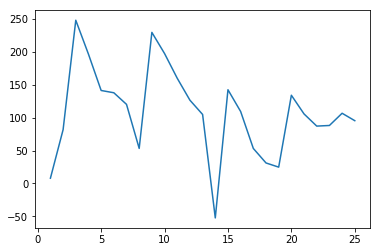

In [177]:
X[X[0] == 'george'].mean().plot()

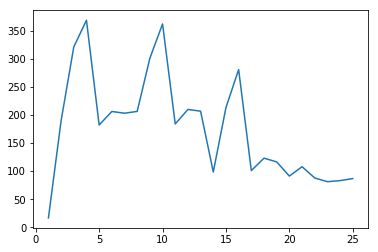

In [178]:
X[X[0] == 'tamara'].mean().plot()

In [194]:
X[X[0] == 'tamara'].min()

0     tamara
1          1
2        157
3        266
4        297
5        156
6        172
7        172
8        157
9        235
10       296
11       156
12       187
13       187
14        78
15       141
16       203
17        63
18        94
19        93
20        78
21        78
22        78
23        63
24        63
25        78
dtype: object

In [187]:
X[X[0] == 'tamara'].mean()

1      16.677419
2     189.548387
3     321.000000
4     368.483871
5     182.032258
6     206.096774
7     203.032258
8     206.225806
9     300.903226
10    361.903226
11    183.935484
12    209.709677
13    206.612903
14     98.387097
15    213.161290
16    280.741935
17    100.870968
18    123.032258
19    116.354839
20     91.161290
21    107.838710
22     87.741935
23     81.161290
24     83.064516
25     86.677419
dtype: float64

In [186]:
X[X[0] == 'tamara'].max()

0     tamara
1         32
2        219
3        406
4        625
5        235
6        265
7        250
8        235
9        390
10       609
11       235
12       265
13       250
14       125
15       312
16       531
17       157
18       187
19       156
20       110
21       141
22        94
23        94
24       109
25       110
dtype: object

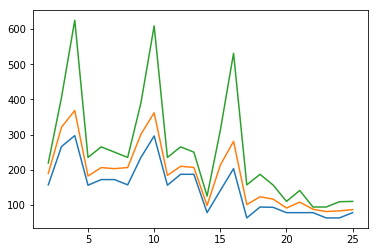

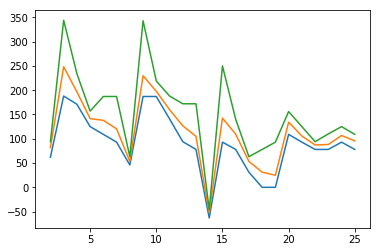

In [205]:
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].min().astype('int'))
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].mean())
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].max())
plt.show()
plt.plot(X[X[0] == 'george'].iloc[:,2:].min())
plt.plot(X[X[0] == 'george'].iloc[:,2:].mean())
plt.plot(X[X[0] == 'george'].iloc[:,2:].max())
plt.show()

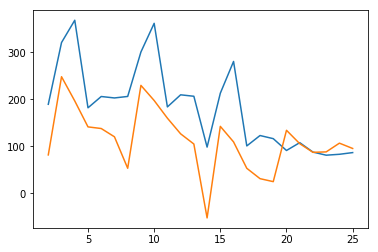

In [218]:
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].mean())
plt.plot(X[X[0] == 'george'].iloc[:,2:].mean())
plt.show()

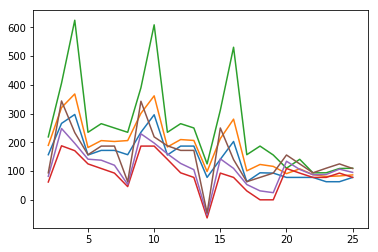

In [206]:
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].min().astype('int'))
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].mean())
plt.plot(X[X[0] == 'tamara'].iloc[:,2:].max())
# plt.show()
plt.plot(X[X[0] == 'george'].iloc[:,2:].min())
plt.plot(X[X[0] == 'george'].iloc[:,2:].mean())
plt.plot(X[X[0] == 'george'].iloc[:,2:].max())
plt.show()

In [220]:
X_train = X.iloc[:,2:]

In [221]:
y_train = X.iloc[:,0:1]

# Настало время Машииного Обучения!!!

In [19]:
def getUserSnDict(userdf):
    uniqUsers = set(userdf.username)
    userSnDict = {}
    for user in uniqUsers:
        sessions = set()
        if not user in userSnDict:
            userSnDict[user] = list()
        for sn in userdf[userdf.username == user].sn:
            if sn not in sessions:
                userSnDict[user].append(sn)
            sessions.add(sn)
    return userSnDict

In [53]:
def getX(fdf):
    phrase = 'dslhbyj'
    X = pd.DataFrame()
    usnd = getUserSnDict(fdf[fdf.phrase == phrase])
    for user in usnd:
        for sn in usnd[user]:
            df = fdf[(fdf.sn == sn) & (fdf.username == user)]
            if df.shape[0] != len(phrase)*2:
                continue
            features_df = pd.DataFrame([[user] + [sn] +
            gettimeBetweenDOWNS(df) + 
            gettimeBetweenUPS(df) +
            gettimeBetweenKey(df) +
            gettimeHoldingKey(df)])
            X = pd.concat([X, features_df], ignore_index=True)
    return X

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
clf = RandomForestClassifier()

In [55]:
X = getX(userdf)

In [56]:
X_train = X.iloc[:,2:]
y_train = X.iloc[:,0:1]

In [59]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

d:\ml\tools\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ml\tools\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ml\tools\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\ml\tools\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

array([1.        , 0.92857143, 0.92857143, 1.        , 1.        ])

In [60]:
clf.fit(X_train, y_train)

d:\ml\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_predict = clf.predict(X_train)

In [69]:
accuracy_score(y_train, y_predict)

1.0

In [75]:
X_trainV, X_testV, y_trainV, y_testV = train_test_split(X_train, y_train, test_size=0.33, random_state=0)
clf.fit(X_trainV, y_trainV)
accuracy_score(y_testV, clf.predict(X_testV))

d:\ml\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9583333333333334